<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/0508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 线性回归

In [0]:
# !pip install mxnet d2l

In [0]:
from mxnet import nd 
from time import time  

a = nd.ones(shape=1000)
b = nd.ones(shape=1000)

In [330]:
start = time()
c = nd.zeros(shape=1000)
for i in range(1000):
    c[i] = a[i] + b[i]
time() - start 

0.2548360824584961

In [331]:
start = time()
d = a + b 
time() - start 

0.0012242794036865234

In [332]:
a = nd.ones(shape=3)
b = 10 
a + b 


[11. 11. 11.]
<NDArray 3 @cpu(0)>

In [0]:
import numpy as np 

a = np.ones(shape=1000)
b = np.ones(shape=1000)

In [334]:
start = time()
c = a + b 
time() - start 

0.00013113021850585938

In [335]:
start = time()
d = np.zeros(shape=1000)
for i in range(1000):
    d[i] = a[i] + b[i]
time() - start 

0.0016636848449707031

## 3.2 线性回归的从零开始实现

In [0]:
%matplotlib inline 
from IPython import display 
from matplotlib import pyplot as plt 
from mxnet import autograd, nd 
import random 

In [0]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [338]:
features[:10]


[[-1.7007433  -1.0938272 ]
 [ 0.97357124  0.5256742 ]
 [-0.7521177   1.1145861 ]
 [ 0.5848042   1.1681417 ]
 [ 0.34398568  1.070783  ]
 [-1.190219   -0.9638411 ]
 [-1.2062182  -1.2049584 ]
 [-0.06416782 -0.84567904]
 [-0.45270032  0.11056607]
 [-0.3724689  -0.04776833]]
<NDArray 10x2 @cpu(0)>

In [339]:
labels[:10]


[ 4.5272565  4.355727  -1.094766   1.3697864  1.2461598  5.100392
  5.8771787  6.960228   2.9173353  3.6234617]
<NDArray 10 @cpu(0)>

In [340]:
features.shape, labels.shape

((1000, 2), (1000,))

In [0]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

In [0]:
def set_figsize(figsize=(5, 3.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize 

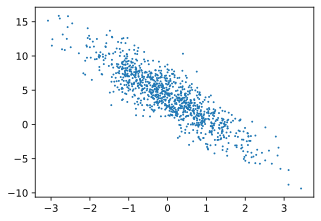

In [343]:
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [0]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [345]:
num = 10 
num

10

In [346]:
indice = list(range(10))
indice

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [347]:
random.shuffle(indice)
indice

[3, 9, 1, 8, 5, 4, 6, 7, 2, 0]

In [348]:
for i in range(0, num, 3):
    print(i)

0
3
6
9


In [349]:
for i in range(0, num, 3):
    j = nd.array(indice[i: i+3])
    print(j)


[3. 9. 1.]
<NDArray 3 @cpu(0)>

[8. 5. 4.]
<NDArray 3 @cpu(0)>

[6. 7. 2.]
<NDArray 3 @cpu(0)>

[0.]
<NDArray 1 @cpu(0)>


In [350]:
for i in range(0, num, 3):
    j = nd.array(indice[i: min(i+3, num)])
    print(i, j)
    # print('-'*19)
    print()

0 
[3. 9. 1.]
<NDArray 3 @cpu(0)>

3 
[8. 5. 4.]
<NDArray 3 @cpu(0)>

6 
[6. 7. 2.]
<NDArray 3 @cpu(0)>

9 
[0.]
<NDArray 1 @cpu(0)>



In [351]:
batch_size = 11 

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break 


[[-0.7856327  -0.02711716]
 [-0.9288065   2.376642  ]
 [-0.86636037  0.18687809]
 [ 0.02822601  0.20286492]
 [ 0.18221758 -0.4614221 ]
 [-0.11887518 -2.699651  ]
 [ 0.17137325  1.4373008 ]
 [-0.43608835  0.03570559]
 [-0.08584901 -0.28736308]
 [ 0.71433234  1.433895  ]
 [-1.7489222   0.82156986]]
<NDArray 11x2 @cpu(0)> 
[ 2.7276561  -5.7417655   1.8328501   3.574372    6.1251307  13.135597
 -0.35012275  3.1914613   5.002168    0.7329084  -2.097486  ]
<NDArray 11 @cpu(0)>


In [0]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1, ))

In [0]:
w.attach_grad()
b.attach_grad()

In [0]:
def linreg(X, w, b):
    return nd.dot(X, w) + b 

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size 

In [357]:
lr = 0.03 
num_epochs = 3 
net = linreg 
loss = squared_loss 

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.081301
epoch 2, loss 0.000507
epoch 3, loss 0.000056


In [358]:
true_w, w

([2, -3.4], 
 [[ 1.9981216]
  [-3.3991144]]
 <NDArray 2x1 @cpu(0)>)

In [359]:
true_b, b 

(4.2, 
 [4.198917]
 <NDArray 1 @cpu(0)>)

In [0]:
y_hat = nd.ones((3, 4))

In [0]:
y = nd.ones((2, 6))

In [363]:
y_hat - y.reshape(y_hat.shape) 


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 3x4 @cpu(0)>

## 3.3 线性回归的简洁实现

In [365]:
from mxnet import autograd, nd 

num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
start = time()
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b + nd.random.normal(scale=0.01, shape=labels.shape)
time() - start 

0.013842344284057617

In [366]:
labels.shape

(1000,)

In [367]:
labels[:10]


[ 6.9050627  9.778392   2.9427702 -4.546339   9.302028   2.690546
  3.616144   5.1789007  9.184089   4.4604273]
<NDArray 10 @cpu(0)>

In [0]:
from mxnet.gluon import data as gdata 

batch_size = 10 
dataset = gdata.ArrayDataset(features, labels)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [372]:
for X, y in data_iter:
    print(X, y)
    break 


[[-0.02098517  1.3668778 ]
 [ 0.96429634  0.07939338]
 [ 0.6255762   1.0138036 ]
 [ 0.9354897   1.8644971 ]
 [-1.4386525   2.2704332 ]
 [-0.01180115 -0.51951075]
 [-1.1116999   0.8136445 ]
 [ 0.85692286 -1.1262228 ]
 [ 0.1695503   1.2992698 ]
 [-0.34039184 -0.17620139]]
<NDArray 10x2 @cpu(0)> 
[-0.48393852  5.858025    1.9972748  -0.28832483 -6.382806    5.9442554
 -0.8116055   9.744788    0.13265407  4.1332865 ]
<NDArray 10 @cpu(0)>


In [390]:
a = nd.ones((10, 2))
b = nd.zeros((10, 1))
data_ab = gdata.ArrayDataset(a, b)
print(data_ab.__getitem__([1, 2, 3]))

(
[[1. 1.]
 [1. 1.]
 [1. 1.]]
<NDArray 3x2 @cpu(0)>, 
[[0.]
 [0.]
 [0.]]
<NDArray 3x1 @cpu(0)>)


In [0]:
data_iter_ab = gdata.DataLoader(data_ab, 2, shuffle=False)

In [396]:
for A, b in data_iter_ab:
    print(A, b)


[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>

[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>

[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>

[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>

[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>


In [0]:
from mxnet.gluon import nn

net = nn.Sequential()

In [0]:
net.add(nn.Dense(1))

In [0]:
from mxnet import init 

net.initialize(init.Normal(sigma=0.01))

In [0]:
from mxnet.gluon import loss as gloss 

loss = gloss.L2Loss()

In [0]:
from mxnet import gluon 

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [411]:
num_epochs = 3 
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.042343
epoch 2, loss: 0.000163
epoch 3, loss: 0.000049


In [412]:
dense = net[0]
true_w, dense.weight.data()

([2, -3.4], 
 [[ 1.9994196 -3.39917  ]]
 <NDArray 1x2 @cpu(0)>)

In [413]:
true_b, dense.bias.data()

(4.2, 
 [4.199317]
 <NDArray 1 @cpu(0)>)